## Problem Statement

This data was extracted from the census bureau database found at

http://www.census.gov/ftp/pub/DES/www/welcome.html

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [3]:
train_set["isTrain"] = 1

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,isTrain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [5]:
test_set["isTrain"] = 0

In [6]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,isTrain
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0


In [7]:
com_data= pd.concat([train_set,test_set])

In [8]:
com_data.shape

(48842, 16)

In [9]:
com_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,isTrain
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.666660
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.471412
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
com_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 16 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
wage_class        48842 non-null object
isTrain           48842 non-null int64
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


In [11]:
com_data.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:

com_data.fillna("unknown",inplace=True)

In [14]:
data=com_data.replace({' ?':"unknown"})

In [15]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
isTrain           0
dtype: int64

In [16]:
data.shape

(48842, 16)

In [17]:
data["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'unknown', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [18]:
data1=pd.get_dummies(data=data,columns=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"])

In [19]:
data1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,isTrain,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_unknown
0,39,77516,13,2174,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,<=50K,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data1.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [21]:
data1=data1.replace({' <=50K':0," >50K":1,' <=50K.':0," >50K.":1})

In [22]:
data1.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,isTrain,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_unknown
0,39,77516,13,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data1.wage_class.unique()

array([0, 1])

In [24]:
train_set = data1[data1["isTrain"]==1]
test_set =  data1[data1["isTrain"]==0]

train_set.drop("isTrain",axis=1,inplace=True)
test_set.drop("isTrain",axis=1,inplace=True)

/home/skull/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [25]:
train_set.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_unknown
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
target=pd.DataFrame(train_set["wage_class"])
train_set.drop("wage_class",axis=1,inplace=True)

output=pd.DataFrame(test_set["wage_class"])
test_set.drop("wage_class",axis=1,inplace=True)


/home/skull/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
type(target)

pandas.core.frame.DataFrame

In [28]:
target

,wage_class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


In [29]:
output

,wage_class
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,1
8,0
9,0


## Problem 1:
### Prediction task is to determine whether a person makes over 50K a year.

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lm=LogisticRegression()

In [32]:
lm.fit(train_set,target)

/home/skull/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
pred= lm.predict(test_set)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [35]:
print(confusion_matrix(output,pred))

[[12020   415]
 [ 2848   998]]


In [36]:
print(accuracy_score(output,pred))

0.7995823352373933


## Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
clf2 = DecisionTreeClassifier(random_state=1, min_samples_leaf=2)
clf2.fit(train_set, target)
predictions = clf2.predict(test_set)

In [39]:
print(accuracy_score(output, predictions))

0.8245193784165592


## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc1 = RandomForestClassifier()
rfc1.fit(train_set, target)
pred1 = rfc1.predict(test_set)
print(accuracy_score(output, pred1))

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8444812972176157


## Boosting

In [42]:
import xgboost as xgb

In [43]:
dtrain = xgb.DMatrix(train_set.values, target.values)
dtest = xgb.DMatrix(test_set.values)

In [44]:
params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'silent':1,
    'eta':1
}

num_rounds = 5

In [45]:
bst = xgb.train(params, dtrain, num_rounds)

In [46]:
preds_prob = bst.predict(dtest)
preds_prob

array([0.01197226, 0.34250093, 0.21092643, ..., 0.8107264 , 0.27583116,
       0.8107264 ], dtype=float32)

In [47]:
output=output.values

In [48]:
labels = dtest.get_label()
preds = preds_prob > 0.5 # threshold
correct = 0

for i in range(len(preds)):
    if (output[i] == preds[i]):
        correct += 1

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Error: {0:.4f}'.format(1-correct/len(preds)))

Predicted correctly: 13839/16281
Error: 0.1500


## Problem 2:
### Which factors are important

/home/skull/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Feature ranking:
1. feature 1 (0.154488)
2. feature 0 (0.144628)
3. feature 5 (0.094206)
4. feature 33 (0.065114)
5. feature 3 (0.062206)
6. feature 53 (0.043873)
7. feature 2 (0.034050)
8. feature 35 (0.033326)
9. feature 41 (0.023439)
10. feature 47 (0.021384)
11. feature 4 (0.021360)
12. feature 24 (0.018795)
13. feature 27 (0.012977)
14. feature 54 (0.012175)
15. feature 9 (0.011261)
16. feature 65 (0.010533)
17. feature 56 (0.009903)
18. feature 26 (0.009727)
19. feature 58 (0.009568)
20. feature 11 (0.009251)
21. feature 64 (0.009034)
22. feature 45 (0.008439)
23. feature 31 (0.008106)
24. feature 29 (0.007535)
25. feature 63 (0.007296)
26. feature 30 (0.007171)
27. feature 104 (0.007081)
28. feature 10 (0.007043)
29. feature 49 (0.006913)
30. feature 40 (0.006483)
31. feature 7 (0.006458)
32. feature 61 (0.005635)
33. feature 12 (0.005560)
34. feature 38 (0.005457)
35. feature 6 (0.005331)
36. feature 57 (0.005296)
37. feature 50 (0.004469)
38. feature 51 (0.004417)
39. feature 

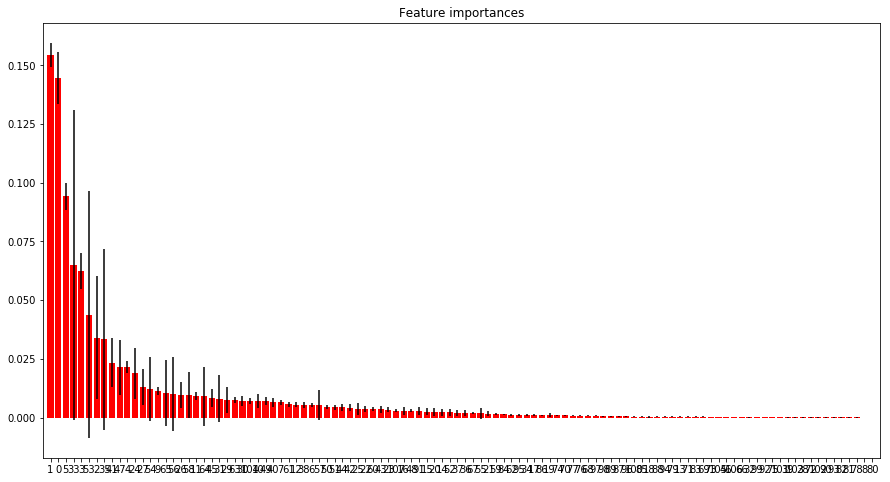

In [51]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import ExtraTreesClassifier



# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(test_set, output)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(test_set.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(test_set.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(test_set.shape[1]), indices)
plt.xlim([-1, test_set.shape[1]])
plt.show()

## Problem 3:
### Which algorithms are best for this dataset

XGBOOST gave 85% of accuracy . This is the best i got with different models